# Handling missing Values

- Ignore missing values/ Delete row.
- Fill missing value manually.
- Create a separate model to handle missing value.
- Global Constant
- Some statistical methods(Mean, median and mode)
- Measure of central tendency for each class
- Most probable value (ML Algorithms)

# Importing important libraries
# 1. Missing completely at random, MCAR
-: A variable is missing completely at random if the probability of being missing is the same for all observations. When data is MCAR, there is absolutely no relationship between the data missing and any othe values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

In [130]:
## importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [131]:
dt= pd.read_csv('Titanic-Dataset.csv')
dt.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [132]:
dt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [133]:
# getting null values of embarked feature.
dt[dt['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


# 2. Missing data not at random (Systematic missing values)
-: There is absolutely some relationship between the data missing and any other values, observed or missing , within the dataset.

In [134]:
dt['cabin_null']=np.where(dt['Cabin'].isnull(),1,0)

# Find the percentage of null values
dt['cabin_null'].mean()

0.7710437710437711

In [135]:
## Checking percentage that how many of the people have survived
dt.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

# Missing at random (MAR)

# Mean, Median, Mode Imputation

-Mean/ Median imputation has the assumption that the data are missing completely at random(MCAR).
We solve this by replacing the nan by the most frequent occurance of the variables.

In [136]:
dt=pd.read_csv('Titanic-Dataset.csv', usecols=['Age','Fare','Survived'])
dt.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [137]:
## Lets go and see the percentage of missing values
dt.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [138]:
def impute_nan(dt,variable, median):
    dt[variable+"_median"]=dt[variable].fillna(median)

In [139]:
median=dt.Age.median()
median

28.0

In [140]:
impute_nan(dt,'Age', median)
dt.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [141]:
print(dt['Age'].std())
print(dt['Age_median'].std())

14.526497332334042
13.019696550973201


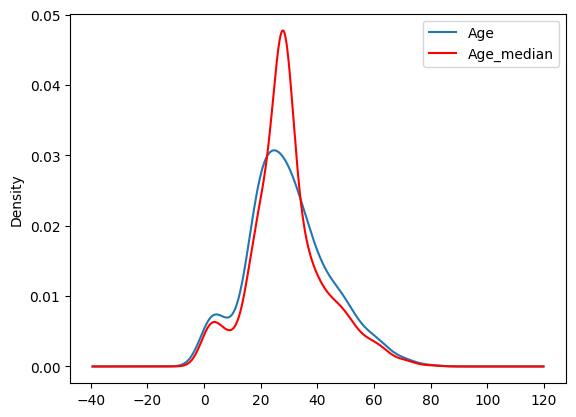

In [142]:
fig =plt.figure()
ax=fig.add_subplot(111)
dt['Age'].plot(kind='kde',ax=ax)
dt.Age_median.plot(kind='kde',ax=ax,color='red')
lines, labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

# Random Sample Imputation

Aim:- It consist of taking random observation from the dataset and we use this observation to replace the nan values.

When to use it-  It assumes that the data are missing completely at random(MCAR).

In [143]:
import pandas as pd
dt=pd.read_csv('Titanic-Dataset.csv',usecols=['Age','Fare','Survived'])
dt.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [144]:
dt.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [145]:
dt.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [146]:
dt['Age'].isnull().sum()
## here we checked total nan values

177

In [147]:
dt['Age'].dropna().sample(dt['Age'].isnull().sum(),random_state=0)
## here we fill every nan values with the random value.

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [148]:
dt[dt['Age'].isnull()].index

Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
      dtype='int64', length=177)

In [149]:
def impute_nan(dt,variable, median):
    dt[variable+"_median"]=dt[variable].fillna(median)
    dt[variable+"_random"]=dt[variable]
    ### It will have the random sample to fill the na.
    random_sample = dt[variable].dropna().sample(dt[variable].isnull().sum(),random_state=0)   
    ## pandas need to have same index in order to merge the dataset
    random_sample.index=dt[dt[variable].isnull()].index ## taking index of all nan values
    dt.loc[dt[variable].isnull(),variable+'_random']=random_sample  ## replacing all the nan values with the random value.

In [150]:
median=dt.Age.median()
median

28.0

In [151]:
impute_nan(dt,"Age",median)

In [152]:
dt.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [153]:
import matplotlib.pyplot as plt
%matplotlib inline

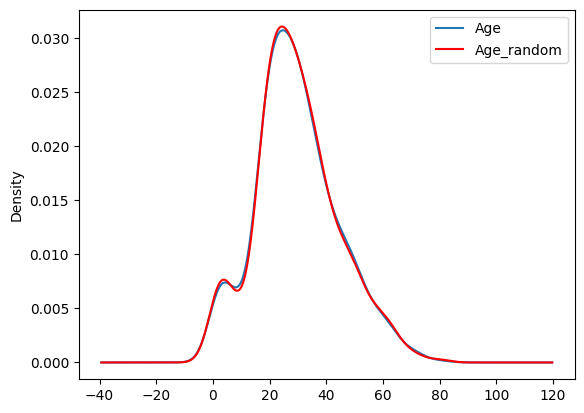

In [154]:
fig =plt.figure()
ax=fig.add_subplot(111)
dt['Age'].plot(kind='kde',ax=ax)
dt.Age_random.plot(kind='kde',ax=ax,color='red')
lines, labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')


### Capturing nan value with new feature

It works well, if the data is not missing completely at random.


In [155]:
dt=pd.read_csv('Titanic-Dataset.csv', usecols=['Age','Fare','Survived'])
dt.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [156]:
import numpy as np
dt['Age_NAN']=np.where(dt['Age'].isnull(),1,0)

In [157]:
dt.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [158]:
dt.Age.median()

28.0

In [159]:
dt['Age'].fillna(dt.Age.median(),inplace=True)

C:\Users\mahor\AppData\Local\Temp\ipykernel_5472\4174245078.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dt['Age'].fillna(dt.Age.median(),inplace=True)


In [160]:
dt.tail(20)

,Survived,Age,Fare,Age_NAN
871,1,47.0,52.5542,0
872,0,33.0,5.0000,0
873,0,47.0,9.0000,0
874,1,28.0,24.0000,0
875,1,15.0,7.2250,0
876,0,20.0,9.8458,0
877,0,19.0,7.8958,0
878,0,28.0,7.8958,1
879,1,56.0,83.1583,0
880,1,25.0,26.0000,0


## End of Distribution Imputation

--> One would want to replace missing data with values that are at tails of distribution of the variable. Simply replacing missing values with far end or extreme.

In [161]:
dt= pd.read_csv('Titanic-Dataset.csv', usecols=['Age','Fare','Survived'])
dt.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<Axes: >

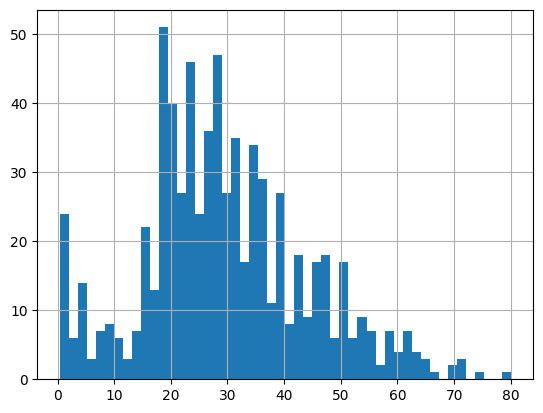

In [162]:
dt.Age.hist(bins=50)

In [163]:
extreme=dt.Age.mean()+3*dt.Age.std()
extreme

73.27860964406094

<Axes: xlabel='Age'>

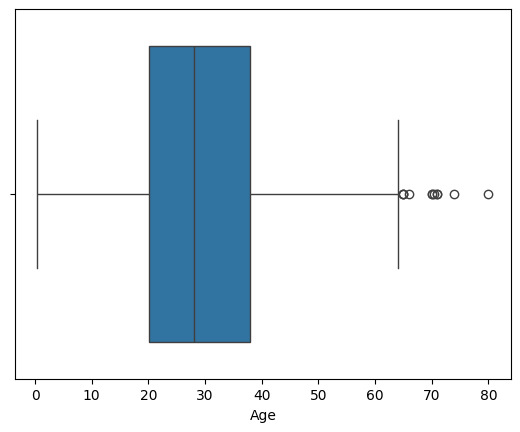

In [164]:
import seaborn as sns 
sns.boxplot(x='Age',data=dt)
## this is just to check the outliers.

In [165]:
def impute_nan(dt, variable,median,extreme):
    dt[variable+"_end_distribution"]=dt[variable].fillna(extreme) ## this is to create an additional variable.
    dt[variable].fillna(median,inplace=True)  ## this is to fill the nan values.

In [166]:
impute_nan(dt,'Age',dt.Age.median(),extreme)

C:\Users\mahor\AppData\Local\Temp\ipykernel_5472\2583849123.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dt[variable].fillna(median,inplace=True)  ## this is to fill the nan values.


In [167]:
dt.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<Axes: >

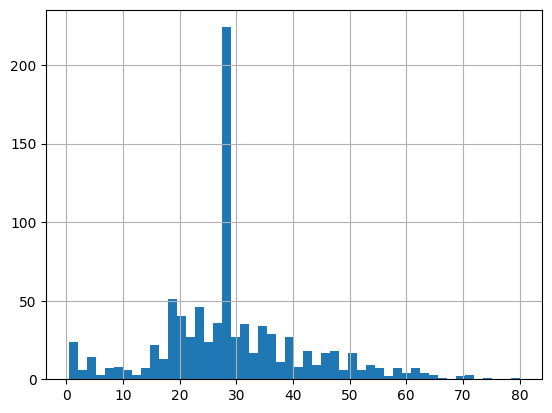

In [168]:
dt['Age'].hist(bins=50)

<Axes: >

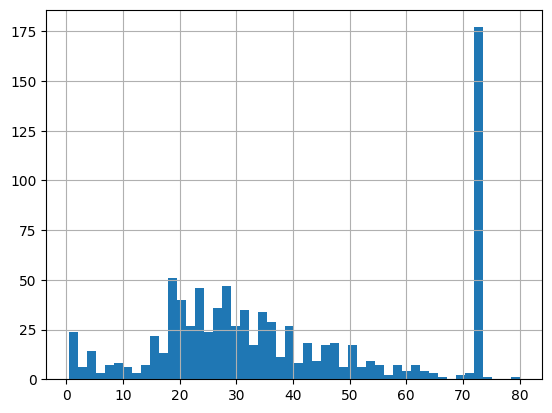

In [169]:
dt['Age_end_distribution'].hist(bins=50)

<Axes: xlabel='Age'>

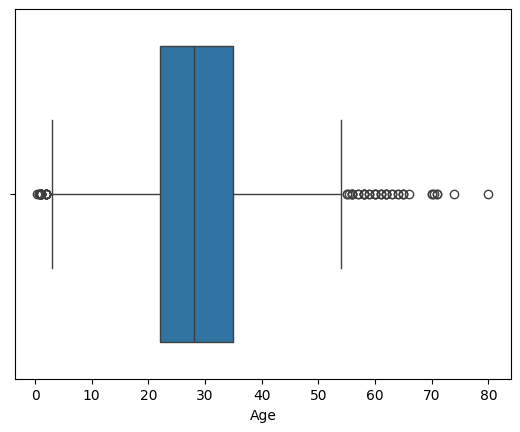

In [170]:
sns.boxplot(data=dt, x='Age')

<Axes: xlabel='Age_end_distribution'>

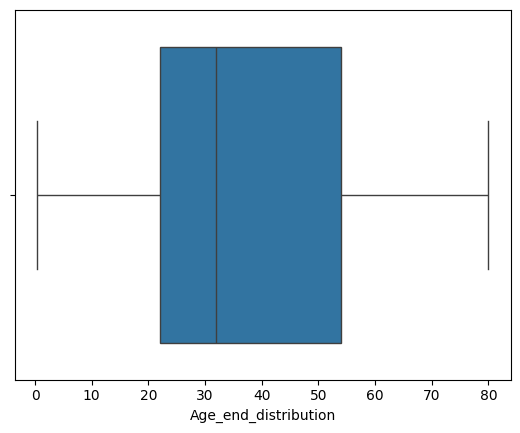

In [171]:
sns.boxplot(data=dt, x='Age_end_distribution')

### Arbitrary Value Imputation

It consist of replacing NAN by an arbitrary value.
Not much important.

In [179]:
import pandas as pd

In [180]:
dt=pd.read_csv("Titanic-Dataset.csv", usecols=['Age','Fare','Survived'])
dt.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [181]:
def impute_nan(dt, variable):
    dt[variable+'_zero']=dt[variable].fillna(0)
    dt[variable+'_hundred']=dt[variable].fillna(100)
    

<Axes: >

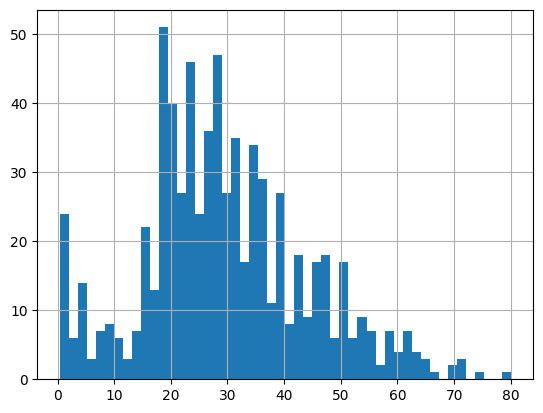

In [182]:
 dt['Age'].hist(bins=50)

## Handling Categorical features